 <img src="./markdown/reco.jpg" alt="Recommendation system" style="display: block;
  margin-left: auto;
  margin-right: auto;
  width: 80%;height:350px"> 

<h1 style="text-align:center;font-size:35px;">Recipe recommendation system</h1>
<br>

<h1 style="font-size:30px;color:#008abc;">Introduction</h1>

#### The goal of this project is to ultimately create a personalized recipe recommendation system that learns from the choice of its users. 
##### Data source and fields explanation:https://data.world/atlas-query/cookbook


##### Due to feasibility limitations, the recommender system will not be able to track users` preferences so that we will come up with a new goal.

## Healthy recommender system 
##### This system will keep track of the ingredients from each recipe, also will keep track of the important and needed intake of nutrients for a healthy nutrition.
<br>

### Import required Libraries.

In [533]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import random

### Load data

In [534]:
df_recipe_recommender = pd.read_csv('./exports/recipe_recommender.csv')
df_recipe_clean = pd.read_csv('./exports/recipe_clean.csv')
df_healthy_nutrients = pd.read_csv('./exports/nutrients_for_health.csv')

#### Add a total duration time for each recipe

In [535]:
df_recipe_clean['total_min'] = df_recipe_clean['prep_min'] + df_recipe_clean['cook_min'] + df_recipe_clean['stnd_min']
df_recipe_clean.head()

,recipe_id,title,servings,prep_min,cook_min,stnd_min,directions,total_min
0,214,Raspberry Chiffon Pie,10,20,8,305,"For crust, preheat oven to 375 degrees F.\nIn...",333
1,215,Apricot Yogurt Parfaits,4,5,2,65,"Drain canned apricots, pour 1/4 cup of the ju...",72
2,216,Fresh Apricot Bavarian,8,5,13,0,Drop apricots into boiling water to cover. R...,18
3,217,Fresh Peaches with Banana Cream Whip,4,10,0,0,"In a small bowl, beat egg white until foamy. ...",10
4,218,Canned Cherry Crisp,6,10,5,0,"Pour cherry pie filling into an 8-inch, round...",15


In [536]:
df_ml_recipe = df_recipe_clean.drop(['servings','directions','prep_min', 'cook_min', 'stnd_min'], axis=1)

In [537]:
df_ml_recipe['rating_outOf_5'] = 3.0
df_ml_recipe

,recipe_id,title,total_min,rating_outOf_5
0,214,Raspberry Chiffon Pie,333,3.0
1,215,Apricot Yogurt Parfaits,72,3.0
2,216,Fresh Apricot Bavarian,18,3.0
3,217,Fresh Peaches with Banana Cream Whip,10,3.0
4,218,Canned Cherry Crisp,15,3.0
...,...,...,...,...
873,1410,No-Bake Chocolate Cheesecake,150,3.0
874,1411,Mexican Cocoa Torte,222,3.0
875,1426,-Pancakes-,20,3.0
876,1427,-Waffles-,25,3.0


### Make healthy recipes

In [538]:
df_healthy_nutrients['healthy'] = False
df_healthy_nutrients.shape

(878, 8)

In [539]:
df_copy = df_healthy_nutrients.copy()
for index, row in df_healthy_nutrients.iterrows():
    if (row['protein'] >= 10 and row['protein'] <= 25) and (row['total_fat'] >= 0 and row['total_fat'] <=25) and (row['calories'] >= 200 and row['calories'] <= 500) and (row['carbo'] >= 5 and row['carbo'] <= 100) and (row['sodium']>= 0 and row['sodium']<=800):
        df_copy.loc[index, 'healthy'] = True
df_copy

,recipe_id,protein,carbo,total_fat,cholestrl,sodium,calories,healthy
0,214,5.47,41.29,11.53,1.39,260.78,290.79,False
1,215,5.70,23.75,1.08,3.48,46.17,141.01,False
2,216,4.90,26.88,1.10,3.46,41.79,137.06,False
3,217,1.77,18.17,0.21,0.00,14.01,81.70,False
4,218,1.38,36.63,5.47,10.36,50.22,201.23,False
...,...,...,...,...,...,...,...,...
873,1427,6.57,30.14,13.74,60.38,173.88,270.50,False
874,1428,9.13,29.91,16.88,144.36,458.80,308.10,False
875,1429,1.35,3.13,0.26,0.00,15.34,20.31,False
876,1432,23.04,60.78,9.27,430.09,1075.80,418.73,False


In [540]:
df_recipe_final = pd.merge(df_copy, df_ml_recipe, on='recipe_id', how='left')
df_recipe_final

,recipe_id,protein,carbo,total_fat,cholestrl,sodium,calories,healthy,title,total_min,rating_outOf_5
0,214,5.47,41.29,11.53,1.39,260.78,290.79,False,Raspberry Chiffon Pie,333,3.0
1,215,5.70,23.75,1.08,3.48,46.17,141.01,False,Apricot Yogurt Parfaits,72,3.0
2,216,4.90,26.88,1.10,3.46,41.79,137.06,False,Fresh Apricot Bavarian,18,3.0
3,217,1.77,18.17,0.21,0.00,14.01,81.70,False,Fresh Peaches with Banana Cream Whip,10,3.0
4,218,1.38,36.63,5.47,10.36,50.22,201.23,False,Canned Cherry Crisp,15,3.0
...,...,...,...,...,...,...,...,...,...,...,...
873,1427,6.57,30.14,13.74,60.38,173.88,270.50,False,-Waffles-,25,3.0
874,1428,9.13,29.91,16.88,144.36,458.80,308.10,False,-French Toast-,15,3.0
875,1429,1.35,3.13,0.26,0.00,15.34,20.31,False,-Mixed Green Salad-,0,3.0
876,1432,23.04,60.78,9.27,430.09,1075.80,418.73,False,Curried Chicken Livers Topped Spud,25,3.0


### Search for total-min outliers

<AxesSubplot:xlabel='total_min'>

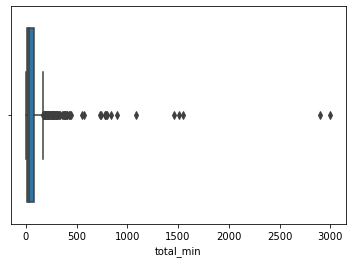

In [541]:
sns.boxplot(x=df_recipe_final['total_min'])

#### Let`s remove all recipes with less than 5 mins and more than 150 mins.

In [542]:
more_5 = df_recipe_final['total_min'] >= 5
less_200 = df_recipe_final['total_min'] < 500
df_result = df_recipe_final[more_5& less_200]
df_result.shape

(749, 11)

<AxesSubplot:xlabel='total_min'>

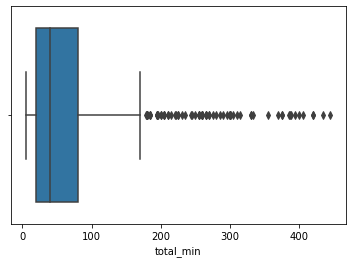

In [543]:
sns.boxplot(x=df_result['total_min'])

In [544]:
df_result.shape

(749, 11)

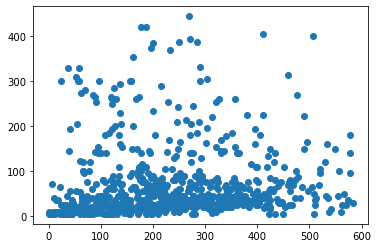

In [545]:
calories = df_result['calories'] < 600
df_ml = df_result[calories]
df_ml
plt.scatter(df_ml['calories'], df_ml['total_min'])

We cannot differentiate clusters in this

In [546]:
k_range = range(1, 10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df_ml[['calories', 'total_min']])
    sse.append(km.inertia_)

In [547]:
sse

[18312220.337023914,
 8820762.99136904,
 5969637.098404678,
 3870752.7634837045,
 3108485.975194998,
 2538694.3979751724,
 2196838.0082603595,
 1851124.8803068884,
 1635101.4725010628]

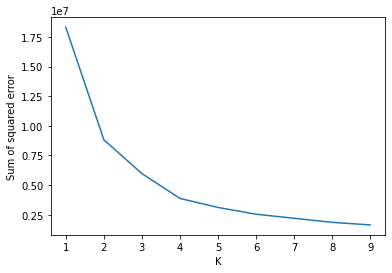

In [548]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range, sse)

In [549]:
X_km = df_ml[['recipe_id','calories', 'total_min', 'rating_outOf_5', 'healthy']].copy()
km = KMeans(n_clusters=4)
km.fit(X_km[['calories', 'total_min']])
centers = pd.DataFrame(km.cluster_centers_, columns=X_km[['calories', 'total_min']].columns)
centers

,calories,total_min
0,239.471133,48.554687
1,86.907333,30.916667
2,180.872464,267.275362
3,420.123684,69.695906


In [550]:
X_km['cluster'] = km.labels_
X_km

,recipe_id,calories,total_min,rating_outOf_5,healthy,cluster
0,214,290.79,333,3.0,False,2
1,215,141.01,72,3.0,False,1
2,216,137.06,18,3.0,False,1
3,217,81.70,10,3.0,False,1
4,218,201.23,15,3.0,False,0
...,...,...,...,...,...,...
872,1426,200.63,20,3.0,False,0
873,1427,270.50,25,3.0,False,0
874,1428,308.10,15,3.0,False,0
876,1432,418.73,25,3.0,False,3


<AxesSubplot:xlabel='calories', ylabel='total_min'>

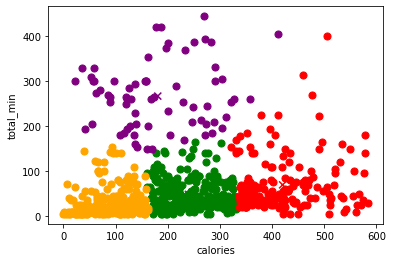

In [551]:
ax = X_km[X_km['cluster']==0].plot(kind='scatter', x='calories', y='total_min', s=50, c='green', sharex=False)
X_km[X_km['cluster']==1].plot(kind='scatter',x='calories',y='total_min',s=50, c='orange', sharex=False, ax = ax)
X_km[X_km['cluster']==2].plot(kind='scatter',x='calories',y='total_min',s=50, c='purple', sharex=False, ax = ax)
X_km[X_km['cluster']==3].plot(kind='scatter',x='calories',y='total_min',s=50, c='red', sharex=False, ax = ax)
centers.plot(kind = 'scatter', x='calories', y='total_min', c=['green','orange','purple', 'red'], s=50, marker='x', sharex=False, ax=ax)

1st approach the user chooses some recipes and we should recommend him more recipes from the same cluster.  This way we do not change the actual clusters, but we want to collect ratings for the given recipes.

1) Scale data that we already have

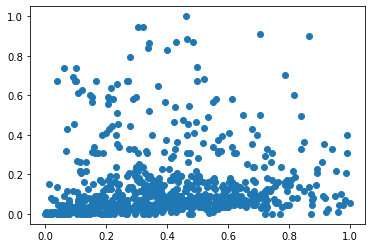

In [552]:
scaler = MinMaxScaler()
X_km[['calories', 'total_min']] = scaler.fit_transform(X_km[['calories', 'total_min']])
plt.scatter(X_km.calories, X_km.total_min)

In [553]:
km = KMeans(n_clusters = 4)
y_predicted = km.fit_predict(X_km[['calories', 'total_min']])
X_km['cluster'] = y_predicted
X_km

,recipe_id,calories,total_min,rating_outOf_5,healthy,cluster
0,214,0.498320,0.745455,3.0,False,2
1,215,0.241593,0.152273,3.0,False,1
2,216,0.234822,0.029545,3.0,False,1
3,217,0.139933,0.011364,3.0,False,1
4,218,0.344812,0.022727,3.0,False,3
...,...,...,...,...,...,...
872,1426,0.343783,0.034091,3.0,False,3
873,1427,0.463543,0.045455,3.0,False,3
874,1428,0.527990,0.022727,3.0,False,3
876,1432,0.717613,0.045455,3.0,False,0


In [554]:
km.cluster_centers_

array([[0.71825082, 0.13674018],
       [0.14784152, 0.05805959],
       [0.33176544, 0.60473752],
       [0.40758356, 0.10033474]])

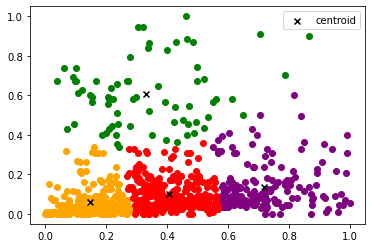

In [555]:
df1 = X_km[X_km.cluster==0]
df2 = X_km[X_km.cluster==1]
df3 = X_km[X_km.cluster==2]
df4 = X_km[X_km.cluster==3]
plt.scatter(df1.calories, df1.total_min, color='purple')
plt.scatter(df2.calories, df2.total_min, color='orange')
plt.scatter(df3.calories, df3.total_min, color='green')
plt.scatter(df4.calories, df4.total_min, color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='x',label='centroid')
plt.legend()

In [556]:
list_of_recipeId = X_km['recipe_id'].to_list()
#from within this list let`s randomly choose 10 recipes
#then calculate what is the most popular cluster from those 10 recipes
#and recommend from that one

random_10_recipes = random.sample(list_of_recipeId, 10)
print(random_10_recipes)
#print(random_10_recipes)
#These 10 recipes a user chose to cook

column_names = X_km.columns
#these are the recipes chosen by the user
df_recipes_chosen = pd.DataFrame(columns = column_names)
for i in random_10_recipes:
    df_recipes_chosen = df_recipes_chosen.append(X_km[X_km['recipe_id'] == i], ignore_index=False)
clusters = df_recipes_chosen['cluster'].to_list()
print(clusters)
def most_frequent_cluster(lst):
    return max(set(lst), key=lst.count)
fav_cluster = most_frequent_cluster(clusters)
print(fav_cluster)
#recommend 10 recipes from that cluster
list_recommendation = X_km[X_km['cluster'] == fav_cluster]
#list_recommendation

#recommend 70% of healthy recipes if exist
list_healthy_recommendation = list_recommendation[list_recommendation['healthy'] == True]
list_nonHealthy_recommendation = list_recommendation[list_recommendation['healthy'] == False]

healthy_length = len(list_healthy_recommendation)
nonHealthy_length = -1

if healthy_length > 6:
    random_healthy_recipes = list_healthy_recommendation.sample(7)
    nonHealthy_length = 3
else:
    random_healthy_recipes = list_healthy_recommendation.sample(healthy_length)
    nonHealthy_length = 10 - healthy_length
    
random_nonHealthy_recipes = list_nonHealthy_recommendation.sample(nonHealthy_length)

frames = [random_healthy_recipes, random_nonHealthy_recipes]
df_recommend = pd.concat(frames)
list_Ids = df_recommend['recipe_id'].to_list()

#Give ratings for the recommended recipes and update X_km table



#Recommend recipes from the df_ml table
column_nam = df_ml.columns
full_recipe_recomm = pd.DataFrame(columns = column_nam)
for i in list_Ids:
    full_recipe_recomm = full_recipe_recomm.append(df_ml[df_ml['recipe_id'] == i], ignore_index=False)
full_recipe_recomm

[544, 526, 1175, 813, 611, 435, 536, 627, 1036, 688]
[0, 0, 0, 1, 0, 1, 2, 0, 0, 1]
0


,recipe_id,protein,carbo,total_fat,cholestrl,sodium,calories,healthy,title,total_min,rating_outOf_5
245,568,14.12,62.12,5.20,14.46,498.53,351.75,True,Southwestern Black Beans and Rice,185,3.0
725,1123,21.91,37.33,9.34,93.22,104.81,321.02,True,"Pacific Chicken, Shrimp and Kiwifruit Kabobs",153,3.0
328,651,22.90,48.94,13.90,23.79,398.09,412.45,True,Mama's Macaroni and Cheese,50,3.0
206,528,21.66,32.80,15.40,56.87,55.64,356.41,True,Warm Moroccan Potato Lamb Salad,40,3.0
344,667,13.39,70.48,6.89,6.56,560.76,397.52,True,Bake Mine Vegetarian,110,3.0
305,628,23.55,37.89,11.48,258.88,352.13,349.06,True,Pasta-Veggie Scramble,20,3.0
729,1127,24.27,64.20,7.91,117.96,578.67,425.12,True,Shrimp-Stuffed Shells,150,3.0
743,1141,23.03,65.83,15.69,30.19,1171.97,496.65,False,Risotto Con Frutti Di Mare,56,3.0
257,580,33.71,27.86,16.55,112.39,280.68,395.24,False,Sweet'N'Sour Pot Roast with Pears,160,3.0
795,1194,25.09,58.57,1.73,221.52,275.49,350.16,False,Sweet-Sour Shrimp,20,3.0
